In [25]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [26]:
df_FIFA_all = df[df['tournament'].str.contains('FIFA', regex = True)]
df_FIFA = df_FIFA_all[df_FIFA_all['tournament'] == 'FIFA World Cup']
df_FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [27]:
df_FIFA.loc[:,'date'] = pd.to_datetime(df_FIFA.loc[:,'date'])
df_FIFA['year'] = df_FIFA['date'].dt.year
df_FIFA['diff_score'] = df_FIFA['home_score'] - df_FIFA['away_score']
df_FIFA['win_team'] = ''
df_FIFA['diff_score'] = pd.to_numeric(df_FIFA['diff_score'])

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [30]:
df_FIFA.loc[df_FIFA['diff_score'] > 0, 'win_team'] = df_FIFA.loc[df_FIFA['diff_score'] > 0, 'home_team']
df_FIFA.loc[df_FIFA['diff_score'] < 0, 'win_team'] = df_FIFA.loc[df_FIFA['diff_score'] < 0, 'away_team']
df_FIFA.loc[df_FIFA['diff_score'] == 0, 'win_team'] = 'Draw'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
def find_win_team(df):

    winners = []

    for i, row in df.iterrows():

        if row['home_score'] > row['away_score']:

            winners.append(row['home_team'])

        elif row['home_score'] < row['away_score']:

            winners.append(row['away_team'])

        else:

            winners.append('Draw')

    return winners




df_FIFA['winner'] = find_win_team(df_FIFA)

df_FIFA.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team,winner
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina,Argentina


In [32]:
s = df_FIFA.groupby('win_team')['win_team'].count()
s.sort_values(ascending=False, inplace=True)
s.drop(labels=['Draw'], inplace=True)

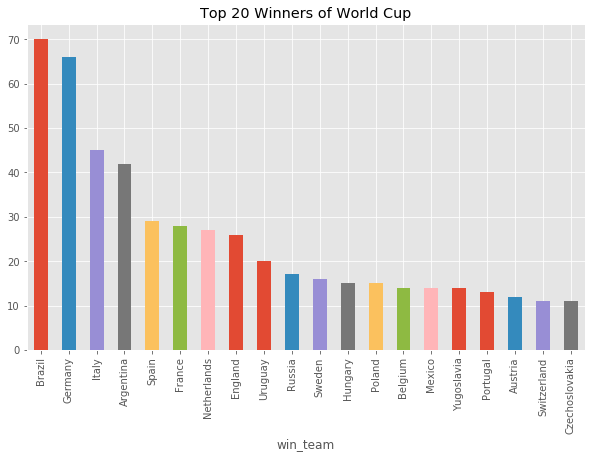

In [33]:
s.head(20).plot(kind='bar', figsize=(10, 6), title='Top 20 Winners of World Cup')

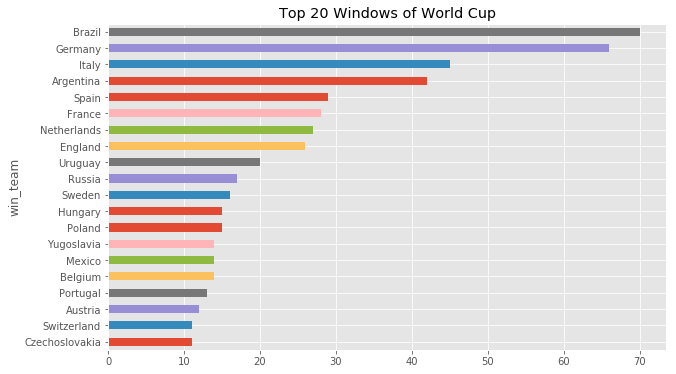

In [34]:
s.sort_values(ascending=True, inplace=True)
s.tail(20).plot(kind='barh', figsize=(10,6), title='Top 20 Windows of World Cup')

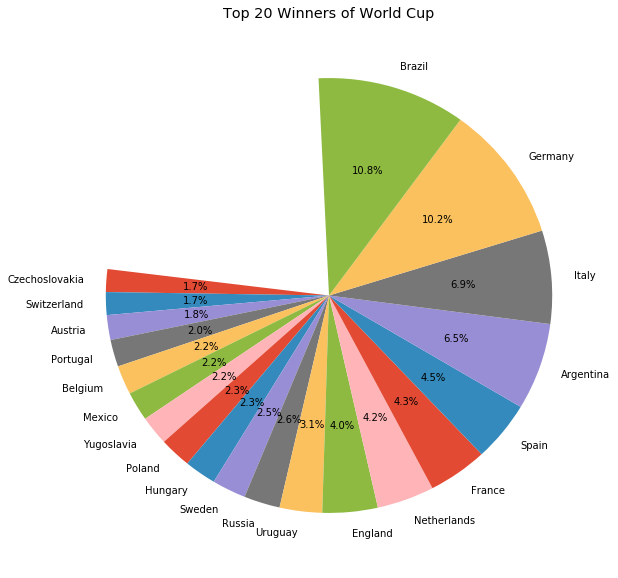

In [41]:
s_percentage = s/s.sum()
s_percentage
s_percentage.tail(20).plot(kind='pie', figsize = (10,10), autopct='%.1f%%',
                          startangle=173, title='Top 20 Winners of World Cup', label='')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


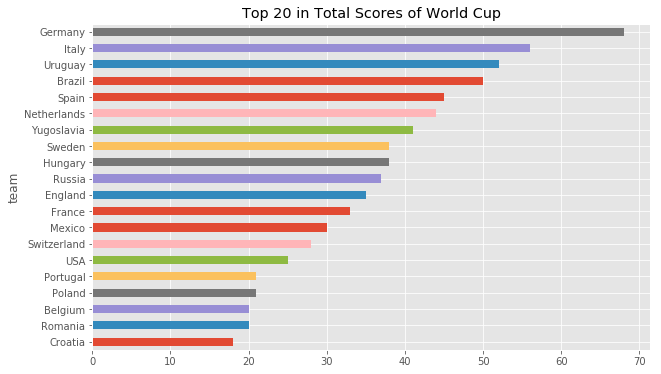

In [44]:
df_score_home = df_FIFA[['home_team', 'home_score']]
column_update = ['team', 'score']
df_score_home.column = column_update
df_score_away = df_FIFA[['away_team', 'away_score']]
df_score_away.columns = column_update
df_score = pd.concat([df_score_home, df_score_away], ignore_index=True)
s_score = df_score.groupby('team')['score'].sum()
s_score.sort_values(ascending=False, inplace=True)
s_score.sort_values(ascending=True, inplace=True)
s_score.tail(20).plot(kind='barh', figsize=(10,6), title='Top 20 in Total Scores of World Cup')

In [47]:
team_list = ['Russia', 'Germany', 'Brazil', 'Portugal', 'Argentina', 'Belgium', 'Poland', 'France',

             'Spain', 'Peru', 'Switzerland', 'England', 'Colombia', 'Mexico', 'Uruguay', 'Croatia',

            'Denmark', 'Iceland', 'Costa Rica', 'Sweden', 'Tunisia', 'Egypt', 'Senegal', 'Iran',

            'Serbia', 'Nigeria', 'Australia', 'Japan', 'Morocco', 'Panama', 'Korea Republic', 'Saudi Arabia']

for item in team_list:
    if item not in s_score.index:
        print(item)

Iceland
Panama
